# Is it a climate disaster?

(last updated: June 21, 2023)

repository: https://github.com/slndaniel/informatievisualisatie/tree/main

# Introduction

# Dataset and preprocessing

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [364]:
temperature_data = pd.read_csv('Temperature_change_cleaned.csv')
temperature_dataframe = pd.DataFrame(temperature_data)
temperature_dataframe.head()


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [365]:
new_temperature_data = pd.read_csv('new_temperature.csv')
new_temperature_dataframe = pd.DataFrame(new_temperature_data)
new_temperature_dataframe.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature,z-score
0,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.777,0.169300
1,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1.743,-0.700639
2,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.516,0.123397
3,2,Afghanistan,7004,April,7271,Temperature change,°C,1961,-1.709,-1.543048
4,2,Afghanistan,7005,May,7271,Temperature change,°C,1961,1.412,0.541270


In [366]:
co2_data = pd.read_csv('CO2_emissions_cleaned.csv')
co2_dataframe = pd.DataFrame(co2_data)
co2_dataframe.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [367]:
co2_dataframe['Mean'] = co2_dataframe.groupby('country_code')['value'].transform('mean')
co2_dataframe['Std'] = co2_dataframe.groupby('country_code')['value'].transform('std')
co2_dataframe['z-score'] = (co2_dataframe['value'] - co2_dataframe['Mean']) / co2_dataframe['Std']

new_co2_dataframe = co2_dataframe[['country_code', 'country_name', 'year', 'value', 'z-score']]

new_co2_dataframe.to_csv('new_co2.csv', index=False)

new_co2_data = pd.read_csv('new_co2.csv')
new_co2_dataframe = pd.DataFrame(new_co2_data)
new_co2_dataframe.head()

,country_code,country_name,year,value,z-score
0,ABW,Aruba,1960,11092.675,0.769185
1,ABW,Aruba,1961,11576.719,0.850040
2,ABW,Aruba,1962,12713.489,1.039926
3,ABW,Aruba,1963,12178.107,0.950496
4,ABW,Aruba,1964,11840.743,0.894143


In [368]:
methane_data = pd.read_csv('Methane_emissions_cleaned.csv')
methane_dataframe = pd.DataFrame(methane_data)
methane_dataframe.head()


,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
1,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
2,India,Total excluding LUCF,CH4,MTCO2e,666.51,661.61,657.69,652.00,653.67,653.53,...,584.49,577.29,567.46,560.74,551.49,543.90,539.00,533.31,528.53,522.74
3,United States,Total excluding LUCF,CH4,MTCO2e,622.59,614.50,609.20,617.17,620.81,618.41,...,688.34,702.98,722.83,738.60,745.84,758.52,751.48,768.67,769.82,766.55
4,Brazil,Total excluding LUCF,CH4,MTCO2e,416.28,421.66,424.80,422.28,416.35,411.88,...,322.94,318.14,311.06,304.62,311.55,311.16,305.47,304.56,300.17,285.24


In [369]:
df_transposed = pd.melt(methane_dataframe, id_vars=['Country'], var_name='Year', value_name='Methane value')
df_transposed.sort_values(['Country', 'Year'], inplace=True)
df_transposed['Year'] = pd.to_numeric(df_transposed['Year'], errors='coerce')
df_transposed = df_transposed.dropna(subset=['Year'])

df_transposed.to_csv('new_methane.csv', index = False)

new_methane_data = pd.read_csv('new_methane.csv')
new_methane_dataframe = pd.DataFrame(new_methane_data)

new_methane_dataframe['Mean'] = new_methane_dataframe.groupby('Country')['Methane value'].transform('mean')
new_methane_dataframe['Std'] = new_methane_dataframe.groupby('Country')['Methane value'].transform('std')
new_methane_dataframe['z-score'] = (new_methane_dataframe['Methane value'] - new_methane_dataframe['Mean']) / new_methane_dataframe['Std']

new_methane_dataframe = new_methane_dataframe[['Country', 'Year', 'Methane value', 'z-score']]

new_methane_dataframe.to_csv('new_methane.csv', index = False)

new_methane_dataframe.head()

,Country,Year,Methane value,z-score
0,Afghanistan,1990.0,8.97,-0.722564
1,Afghanistan,1991.0,9.07,-0.718711
2,Afghanistan,1992.0,8.99,-0.721793
3,Afghanistan,1993.0,8.89,-0.725647
4,Afghanistan,1994.0,8.96,-0.722950


In [370]:
elnino_data = pd.read_csv('ElNino_LaNina_cleaned.csv')
elnino_dataframe = pd.DataFrame(elnino_data)
elnino_dataframe.head()


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [371]:
new_elnino_data = pd.read_csv('ElNino_LaNina_cleaned.csv')
new_elnino_dataframe = pd.DataFrame(new_elnino_data)

z_scores = new_elnino_dataframe.iloc[:, 1:].apply(lambda row: (row - np.mean(row)) / np.std(row), axis=1)
new_elnino_dataframe['Mean_Value'] = new_elnino_dataframe.iloc[:, 1:].mean(axis=1)
new_elnino_dataframe = new_elnino_dataframe[['year', 'Mean_Value']]

new_elnino_dataframe.to_csv('new_elnino_lanina.csv')

new_elnino_dataframe.head()


,year,Mean_Value
0,1950,-0.283333
1,1951,0.608333
2,1952,0.350000
3,1953,0.375000
4,1954,-0.733333


# Perspective one

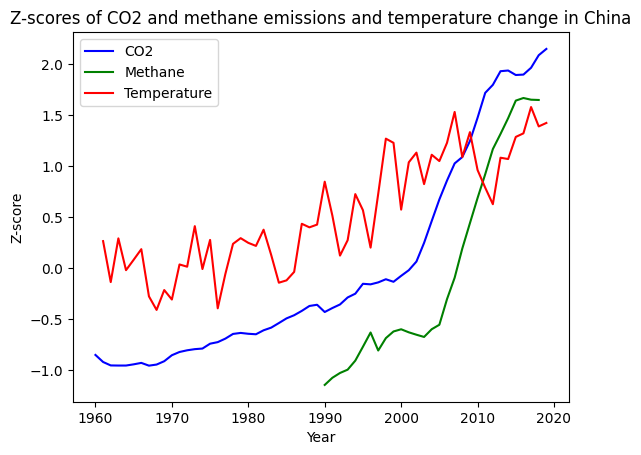

In [372]:
co2_china = new_co2_dataframe[(new_co2_dataframe['country_name'] == 'China') & (new_co2_dataframe['year'].between(1960, 2023))]
methane_china = new_methane_dataframe[(new_methane_dataframe['Country'] == 'China') & (new_methane_dataframe['Year'].between(1960, 2023))]
temperature_china = new_temperature_dataframe[(new_temperature_dataframe['Area'] == 'China') & (new_temperature_dataframe['Year'].between(1960, 2023)) & (new_temperature_dataframe['Months'] == 'Meteorological year')]

plt.plot(co2_china['year'], co2_china['z-score'], label='CO2', color='blue')
plt.plot(methane_china['Year'], methane_china['z-score'], label='Methane', color='green')
plt.plot(temperature_china['Year'], temperature_china['Temperature'], label='Temperature', color='red')

plt.xlabel('Year')
plt.ylabel('Z-score')
plt.title('Z-scores of CO2 and methane emissions and temperature change in China')
plt.legend()
plt.show()


In [373]:
trace = go.Scatter(
    x=co2_china['z-score'],
    y=methane_china['z-score'],
    mode='markers',
    marker=dict(
        size=abs(temperature_china['Temperature']) * 10,
        sizemode='diameter',
        sizeref=0.1,
        color=temperature_china['Temperature'],
        colorscale='Viridis',
        showscale=True,
        cmin=temperature_china['Temperature'].min(),
        cmax=temperature_china['Temperature'].max()
    ),
    text=co2_china['z-score'],
    hovertemplate=
    '<b>CO2: %{x}</b><br>'+
    '<b>Methane: %{y}</b><br>'+
    '<b>Temperature Z-Score: %{marker.size}</b><br>',
)

layout = go.Layout(
    title='CO2, Methane, and Temperature Z-Scores in China',
    xaxis=dict(title='CO2'),
    yaxis=dict(title='Methane'),
    hovermode='closest',
    margin=dict(
        l=100,
        r=80,
        t=100,
        b=130 
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    annotations=[
        dict(
            text='Caption: Bubble chart showing the relationship between CO2 and Methane z-scores in China, with the size of the dots representing <br>'+
            'the intensity of the Temperature Z-Scores. The blue dots represent a higher temperature than the purple dots, <br>'+
            'indicating a relationship between higher temperatures and rising CO2 and methane levels.',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.42,
            showarrow=False,
            font=dict(
                size=12,
                color='black'
            )
        )
    ],
    height=500, 
    width=1000  
)


fig.show()

# Perspective two

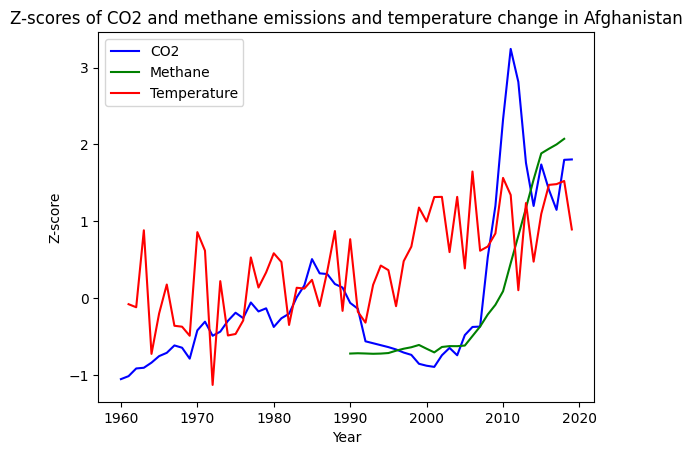

In [374]:
co2_afghanistan = new_co2_dataframe[(new_co2_dataframe['country_name'] == 'Afghanistan') & (new_co2_dataframe['year'].between(1960, 2023))]
methane_afghanistan = new_methane_dataframe[(new_methane_dataframe['Country'] == 'Afghanistan') & (new_methane_dataframe['Year'].between(1960, 2023))]
temperature_afghanistan = new_temperature_dataframe[(new_temperature_dataframe['Area'] == 'Afghanistan') & (new_temperature_dataframe['Year'].between(1960, 2023)) & (new_temperature_dataframe['Months'] == 'Meteorological year')]

plt.plot(co2_afghanistan['year'], co2_afghanistan['z-score'], label='CO2', color='blue')
plt.plot(methane_afghanistan['Year'], methane_afghanistan['z-score'], label='Methane', color='green')
plt.plot(temperature_afghanistan['Year'], temperature_afghanistan['Temperature'], label='Temperature', color='red')

plt.xlabel('Year')
plt.ylabel('Z-score')
plt.title('Z-scores of CO2 and methane emissions and temperature change in Afghanistan')
plt.legend()
plt.show()

In [375]:
trace = go.Scatter(
    x=co2_afghanistan['z-score'],
    y=methane_afghanistan['z-score'],
    mode='markers',
    marker=dict(
        size=abs(temperature_afghanistan['Temperature']) * 7,
        sizemode='diameter',
        sizeref=0.1,
        color=temperature_afghanistan['Temperature'],
        colorscale='Viridis',
        showscale=True,
        cmin=temperature_afghanistan['Temperature'].min(),
        cmax=temperature_afghanistan['Temperature'].max()
    ),
    text=co2_afghanistan['z-score'],
    hovertemplate=
    '<b>CO2: %{x}</b><br>'+
    '<b>Methane: %{y}</b><br>'+
    '<b>Temperature Z-Score: %{marker.size}</b><br>',
)

layout = go.Layout(
    title='CO2, Methane, and Temperature Z-Scores in Afghanistan',
    xaxis=dict(title='CO2'),
    yaxis=dict(title='Methane'),
    hovermode='closest',
     margin=dict(
        l=100,
        r=80,
        t=100,
        b=130 
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    annotations=[
        dict(
            text='Caption: Bubble chart showing the relationship between CO2 and Methane z-scores in Afghanistan, with the size of the dots representing <br>'+
            'the intensity of the Temperature Z-Scores. The green dots represent a higher temperature than the purple dots, <br>'+
            'you can see big green dots in the lower left and upper right corners, <br>'+
            'indicating that there is no relationship between higher temperatures and rising CO2 and methane levels.',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.4,
            showarrow=False,
            font=dict(
                size=12,
                color='black'
            )
        )
    ],
    height=500, 
    width=1000  
)

fig.show()

# Perspective three

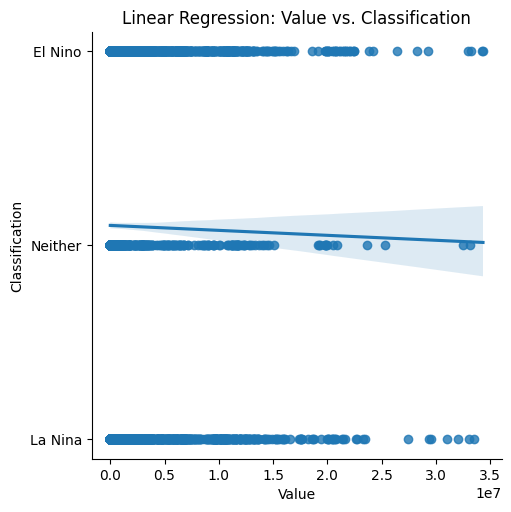

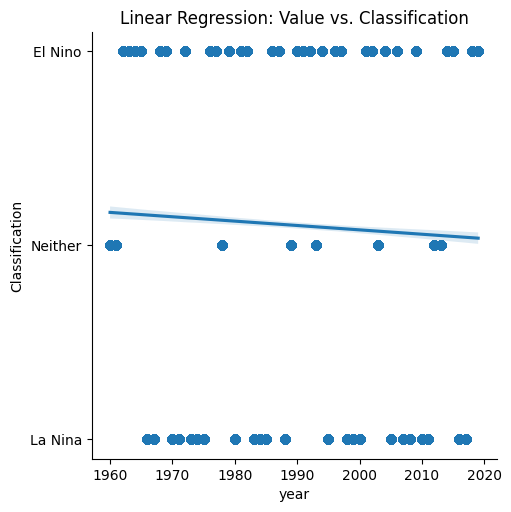

In [376]:
CO2_elnino_df = pd.read_csv('CO2_merge_elnino_lanina.csv')


sns.lmplot(data=CO2_elnino_df, x='value', y='Classification')
plt.yticks([0, 1, 2], ['La Nina', 'Neither', 'El Nino'])
plt.xlabel('Value')
plt.ylabel('Classification')
plt.title('Linear Regression: Value vs. Classification')
plt.show()

sns.lmplot(data=CO2_elnino_df, x='year', y='Classification')
plt.yticks([0, 1, 2], ['La Nina', 'Neither', 'El Nino'])
plt.xlabel('year')
plt.ylabel('Classification')
plt.title('Linear Regression: Value vs. Classification')
plt.show()